In [683]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [684]:
train_data = pd.read_csv('train_cleaned.csv')

##### -------- Choose Alternatives --------

Here, you can choose to 
- (a) Use the full training data set, along with the full test dataset and a 100% accurate submission for the survival results
- (b) Split the training dataset (test_size can be varied)

In [685]:
# (a)
test_data_x = pd.read_csv('test_cleaned.csv')
test_data_y = pd.read_csv('true_submission.csv')

x_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, :1].values
x_test = test_data_x.values
y_test = test_data_y['Survived'].values

In [686]:
# # (b)
# x = train_data.iloc[:, 1:].values
# y = train_data.iloc[:, :1].values
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#### -------- Choose Alternatives End --------

## Modelling

In [687]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#### KNN

First, we find the optimal value for k (number of nearest neighbours), meaning the one that will produce the lowest error rate.

In [688]:
error_rate=[]
for i in range (1,31):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train.ravel())
    predict_i=clf.predict(x_test)
    error_rate.append(1 - accuracy_score(y_test, predict_i))

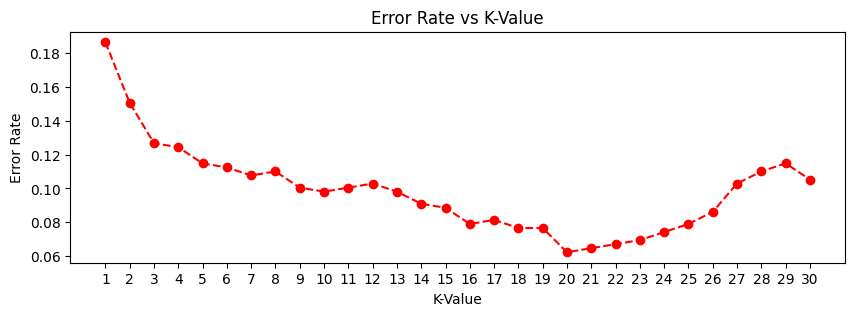

In [689]:
plt.figure(figsize=(10,3))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="red",
         linestyle="dashed",color="red")
plt.title("Error Rate vs K-Value")
plt.xlabel("K-Value")
plt.ylabel("Error Rate")
plt.xticks(range(1,31))
plt.show()

In [690]:
# Set optimal K-Value
k_value = error_rate.index(min(error_rate)) + 1
k_value

20

In [691]:
knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(x_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=20)

In [692]:
y_pred_knn = knn.predict(x_test)

In [693]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       272
           1       0.87      0.97      0.92       146

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.93       418
weighted avg       0.94      0.94      0.94       418



In [694]:
results_knn = pd.crosstab(y_test.ravel(), y_pred_knn, rownames=['Actual'], colnames=['Predicted'], margins=True)
results_knn

Predicted,0.0,1.0,All
Actual,,,
0,251,21,272
1,5,141,146
All,256,162,418


In [695]:
print('Percent of TN (did not survive):', results_knn[0][0]/results_knn['All'][0]*100)
print('Percent of TP (survived):', results_knn[1][1]/results_knn['All'][1]*100)

Percent of TN (did not survive): 92.27941176470588
Percent of TP (survived): 96.57534246575342


#### Discriminant Analysis

In [696]:
lda = LinearDiscriminantAnalysis(n_components = 1)
lda.fit(x_train, y_train.ravel())

LinearDiscriminantAnalysis(n_components=1)

In [697]:
y_pred_lda = lda.predict(x_test)

In [698]:
print(classification_report(y_test, y_pred_lda))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       272
           1       0.82      0.92      0.87       146

    accuracy                           0.90       418
   macro avg       0.89      0.91      0.90       418
weighted avg       0.91      0.90      0.90       418



In [699]:
results_lda = pd.crosstab(y_test.ravel(), y_pred_lda, rownames=['Actual'], colnames=['Predicted'], margins=True)
results_lda

Predicted,0.0,1.0,All
Actual,,,
0,242,30,272
1,11,135,146
All,253,165,418


In [700]:
print('Percent of TN (did not survive):', results_lda[0][0]/results_lda['All'][0]*100)
print('Percent of TP (survived):', results_lda[1][1]/results_lda['All'][1]*100)

Percent of TN (did not survive): 88.97058823529412
Percent of TP (survived): 92.46575342465754


#### Logistic Regression

In [701]:
lr = LogisticRegression()
lr.fit(x_train, y_train.ravel())

LogisticRegression()

In [702]:
y_pred_lr = lr.predict(x_test)

In [703]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       272
           1       0.80      0.92      0.86       146

    accuracy                           0.89       418
   macro avg       0.88      0.90      0.89       418
weighted avg       0.90      0.89      0.90       418



In [704]:
results_lr = pd.crosstab(y_test.ravel(), y_pred_lr, rownames=['Actual'], colnames=['Predicted'], margins=True)
results_lr

Predicted,0.0,1.0,All
Actual,,,
0,239,33,272
1,11,135,146
All,250,168,418


In [705]:
print('Percent of TN (did not survive):', results_lr[0][0]/results_lr['All'][0]*100)
print('Percent of TP (survived):', results_lr[1][1]/results_lr['All'][1]*100)

Percent of TN (did not survive): 87.86764705882352
Percent of TP (survived): 92.46575342465754


# Compare

#### Manual Run

In [706]:
print('Accuracy KNN: {:.2f}'.format(accuracy_score(y_test, y_pred_knn)))
print('Accuracy LDA: {:.2f}'.format(accuracy_score(y_test, y_pred_lda)))
print('Accuracy LR: {:.2f}'.format(accuracy_score(y_test, y_pred_lr)))

Accuracy KNN: 0.94
Accuracy LDA: 0.90
Accuracy LR: 0.89


In [707]:
print('Error Rate KNN: {:.2f}'.format(1 - accuracy_score(y_test, y_pred_knn)))
print('Error Rate LDA: {:.2f}'.format(1 - accuracy_score(y_test, y_pred_lda)))
print('Error Rate LR: {:.2f}'.format(1 - accuracy_score(y_test, y_pred_lr)))

Error Rate KNN: 0.06
Error Rate LDA: 0.10
Error Rate LR: 0.11


#### Automated Run (KFold)

LR: 0.818235 (STD: 0.072569)
LDA: 0.814967 (STD: 0.073723)
KNN: 0.817386 (STD: 0.088498)
CART: 0.785948 (STD: 0.088066)
NB: 0.760261 (STD: 0.085145)
SVM: 0.838627 (STD: 0.078974)



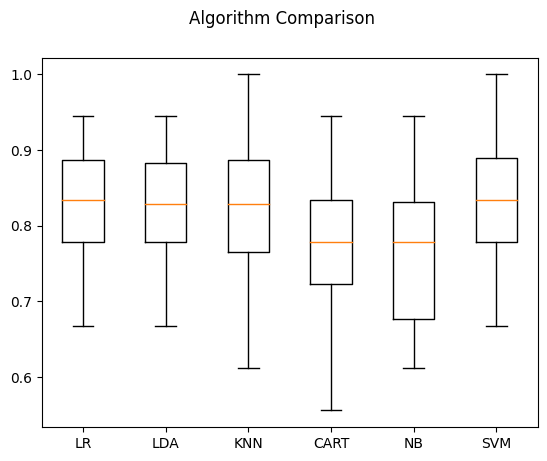

In [716]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=k_value)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=50)
	cv_results = model_selection.cross_val_score(model, x_train, y_train.ravel(), cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	desc = "%s: %f (STD: %f)" % (name, cv_results.mean(), cv_results.std())
	print(desc)

# boxplot algorithm comparison
print('')
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Most important variable

In [711]:
coeff_df = pd.DataFrame(train_data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lr.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,female,0.711585
23,Title_Mrs,0.401732
11,cabin_E,0.338603
19,friends_num,0.256077
10,cabin_D,0.245386
24,Title_honorary_title,0.229665
20,has_relative,0.195740
8,cabin_B,0.147372
12,cabin_F,0.116673
21,Title_Miss,0.111676


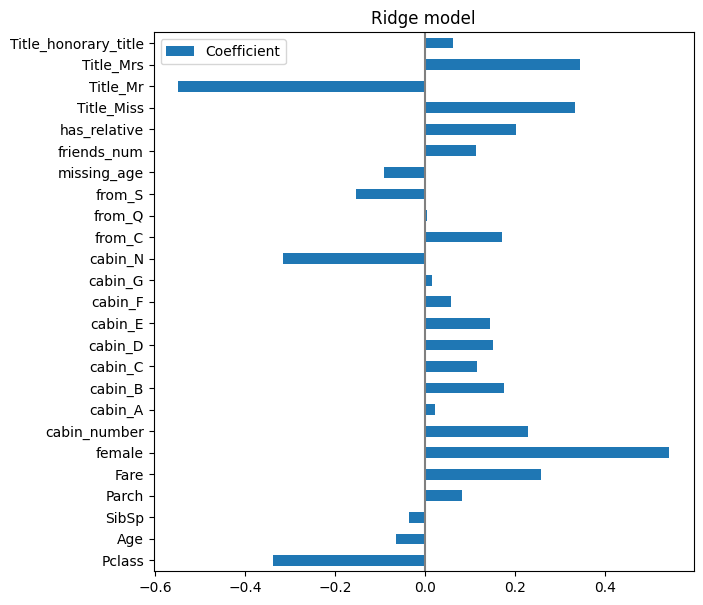

In [712]:
coefs = pd.DataFrame(train_data.corr()['Survived'][1:]).rename(columns={'Survived': 'Coefficient'})

coefs.plot(kind='barh', figsize=(9, 7), sort_columns=True)
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)


model score on training data: 0.9876543209876543
model score on testing data: 0.8373205741626795


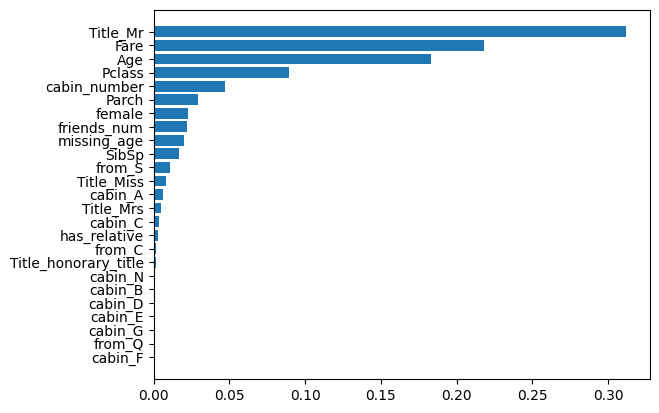

In [713]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train.ravel())
print(f'model score on training data: {model.score(x_train, y_train)}')
print(f'model score on testing data: {model.score(x_test, y_test)}')

importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(train_data.columns[1:])[indices])

# Create Submission using best performing model (SVC)

In [731]:
model = SVC()
model.fit(x_train, y_train.ravel())
y_pred = model.predict(x_test)

In [732]:
y_pred_int = [int(n) for n in y_pred]

In [733]:
submission = pd.read_csv('test_id.csv')

In [738]:
submission['Survived'] = y_pred_int

In [735]:
submission.to_csv('submission.csv', index=False)